

Infi-flux License

Copyright (c) Sept, 10 2023 Infi-flux

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE AND HYPERLINKS LINKED TO EXTERNAL SITES PROOVIDED BELOW OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE AND HYPERLINKS LINKED TO EXTERNAL SITES PROOVIDED IN THIS DIALOGUE.




#**Objective**

To simulate two of the higher level position sizing investment strategies which are additive and geometric type investment strategy and further optimize the Geometric investment strategies with one of the famous approaches called Kelly criterion assuming an ideal environment for risk management with one goal to maximize the growth rate of the entire capital at the end of the investment journey.

What is Position sizing? - >

Position sizing is the strategic allocation of capital for each trade within a portfolio, aiming to manage risk effectively while optimizing potential returns. It involves determining the appropriate amount of capital to invest in a trade based on factors such as risk tolerance, account size, trading strategy, and market conditions. One common approach is the fixed fractional position sizing method, where a fixed percentage of trading capital is allocated to each trade. This ensures consistent risk exposure across trades and helps prevent overexposure to any single position. Position sizing strategies are crucial in maintaining a balanced portfolio and achieving long-term trading success.

We will be discussing 2 different strategies. Warning, this methods are not Fixed Fractional sizing and Fixed Percentage sizing respectively, for demonstration purposes we have named and define them as follows to keep matters as simple as possible and will only follow the below mentioned criteria.
1.   Additive Investment.
2.   Geometric Investment.

There is only one difference between the above 2 strategies. The difference is how you place your next trades/re-invest in that particular instruments again and again.
If you are placing N trades. and you have placed you're first trade, what would be your strategy to invest a certain amount in the next trade and what will be your pattern for placing further trades till N trades is what basically position sizing is .

In Additive Investment Strategies, you invest a fixed amount every single time irrespective of the profits or loss encountered every time you place a trade / re-invest into the instrument.

In Geometric Investment Strategies, you invest the entire capital (wealth) for every single trade, this include the profits / loss included in that capital.

Both of this stratigies have their pros and cons. We are going to discuss in detail.

Please Watch [The "Just One More" Paradox](https://youtu.be/_FuuYSM7yOo?si=cKoqZRRLF-M44enl) by [Marcin Anforowicz](https://www.youtube.com/@marcinanforowicz8319) . The tutorial have followed geometric and then additive investment simulations.

Geometric investment Strategies

Simple game of coin toss representing win on heads and loss on tails with a probability of 0.5 with payouts 0.8 on win and lose 0.5 of the capital on loss. Number of bets / trade-investments are 50 . probability of 1/2 chance of win/loss.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#functions

# simple investment geometric strategy
def S_I_G_S(p, b, a, initial_capital, num_bets):
    bet_sizes = []
    cap_li = []
    capital = initial_capital
    cap_li.append(capital)
    for _ in range(num_bets):
        bet_size = capital
        outcome = np.random.choice([0, 1], p=[1 - p, p])   # our con toss
        capital -= bet_size # removing the capital / simulating investment
        capital += bet_size * (1+b) if outcome == 1 else  bet_size *(1- a)   # adding back profit or loss
        # maintaining records
        bet_sizes.append(bet_size)
        cap_li.append(capital)

    return capital, bet_sizes, cap_li

# simple investment Additive strategy
def S_I_A_S(p, b, a, initial_capital, num_bets):
    bet_sizes = []
    cap_li = []
    capital = initial_capital
    cap_li.append(capital)
    for _ in range(num_bets):
        bet_size = 50         # FIXED AMOUNT
        outcome = np.random.choice([0, 1], p=[1 - p, p])   # our con toss
        capital -= bet_size # removing the capital / simulating investment
        capital += bet_size * (1+b) if outcome == 1 else  bet_size *(1- a)   # adding back profit or loss
        # maintaining records
        bet_sizes.append(bet_size)
        cap_li.append(capital)

    return capital, bet_sizes, cap_li


# simple investment geometric kelly strategy

def kelly_criterion(p, b, a):
    q = 1 - p
    f = (p/a - q/b)
    return f

def S_I_G_K_S(p, b, a, initial_capital, num_bets):
    bet_sizes = []
    cap_li = []
    f = kelly_criterion(p, b, a)
    '''
    Please note this
    there are some conditions on considering initial capital , the first amount to be invested.
    the condition are for f < 1 depending on different payout. if wining payout is greater than losing payout,
    we have included the whole capital. This helps in case of wining and geometric nature,
    this helps in the long run and one can see in the average growth rate. By removing below conditions of capital
    and replacing it with 'capital = initial_capital * f' . and in case of a > b we have consider the fraction of the initial capital.
    In case of having edge and better payoff , while considering initial capital, one have better chances of growing the capital .
    if the whole initial capital is consider.  Food for thought try it you self.
    '''

    ###############################
    # conditions on initial capital
    if f > 1 :
      capital = f*initial_capital
    elif f < 1 and b > a:
      capital = initial_capital
    elif f < 1 and a > b:
      capital = initial_capital * f
    cap_li.append(capital)
    ###############################
    # the original assumption
    # capital _ initial_capital * f
    ###############################

    for _ in range(num_bets):
        bet_size = f * capital
        outcome = np.random.choice([0, 1], p=[1 - p, p])   # our con toss
        capital -= bet_size # removing the capital / simulating investment
        capital += bet_size * (1+b) if outcome == 1 else  bet_size *(1- a)   # adding back profit or loss
        # maintaining records
        bet_sizes.append(bet_size)
        cap_li.append(capital)

    return capital, bet_sizes, cap_li

# simulation driver

def monte_carlo(p,b,a,initial_capital, num_bets, monte, strategy):
  # you would have to wait for an 20 minutes to simulate a million simulation [Monte Carlo Simulation].
  # we will use 10,000, 10K for now, if you want more accurate results , just change the monte variable to 1000000.
  # monte = 10000
  # keeping records
  fin_cap = []
  caps_li = []
  gr_rate = []

  for i in range(monte):
      if strategy == 'Geometric':
        final_capital, bet_sizes, cap_li = S_I_G_S(p, b, a, initial_capital, num_bets)
      elif strategy == 'Additive':
        final_capital, bet_sizes, cap_li = S_I_A_S(p, b, a, initial_capital, num_bets)
      elif strategy == 'Kelly':
        final_capital, bet_sizes, cap_li = S_I_G_K_S(p, b, a, initial_capital, num_bets)

      fin_cap.append(final_capital)
      gr_rate.append((final_capital - initial_capital)/(initial_capital))
      caps_li.append(cap_li)
      if i%(monte/10) == 0:
          print(i)
  return caps_li, gr_rate

# results plots

def results(caps_li,gr_rate, strategy):
  df = pd.DataFrame(caps_li).T
  print ('Capital Median - >',
      df.median(axis = 1).iloc[-1],', Capital Mean -> ',
      df.mean(axis = 1).iloc[-1])
  print('Growth rate Median ->',
      pd.DataFrame(gr_rate).median().iloc[0], 'Growth rate Mean ->',
      pd.DataFrame(gr_rate).mean().iloc[0] - 1
  )

  colors = plt.cm.tab20.colors
  for i, column in enumerate(df.columns):
      plt.plot(df.index, df[column], label=column, color=colors[i%20])
  plt.xlabel('Bets')
  plt.ylabel('Cap')
  plt.legend([])
  plt.show()
  if strategy != 'Additive':
    dff = np.log(pd.DataFrame(caps_li)).T
    colors = plt.cm.tab20.colors
    for i, column in enumerate(dff.columns):
        plt.plot(df.index, dff[column], label=column, color=colors[i%20])
    plt.xlabel('Bets')
    plt.ylabel('Cap')
    plt.legend([])
    plt.show()
  else:
    print(' No need for logarithmic view for Additive Investment strategies -> ')

  plt.plot(df.index, df.mean(axis = 1), label='Mean', color='black')
  plt.plot(df.index, df.median(axis = 1), label='Median', color='red')

  plt.xlabel('Bets')
  plt.ylabel('Cap')
  plt.legend()
  plt.show()
  df.median(axis = 1).plot()
  plt.ylabel('Median Value')
  plt.xlabel('Bets')

  # Show the plot
  plt.show()

In [3]:
#geometric style
# Execution
p = 0.5                # Probability of winning
b = 0.8                # Payoff for winning
a = 0.5                # Payoff for losing 1 ~ 100 % loss
initial_capital = 100  # Initial capital
num_bets = 50          # Number of bets to simulate
monte = 10000
caps_li, gr_rate = monte_carlo(p,b,a,initial_capital, num_bets, monte,'Geometric')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Capital Median - > 7.17897987691853 , Capital Mean ->  42060.66041453966
Growth rate Median -> -0.9282102012308147 Growth rate Mean -> 418.6066041453966


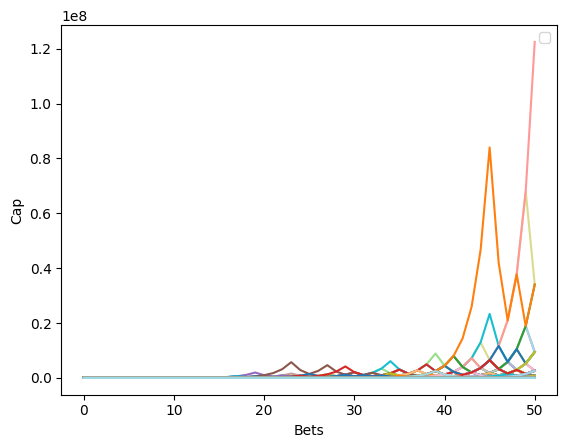

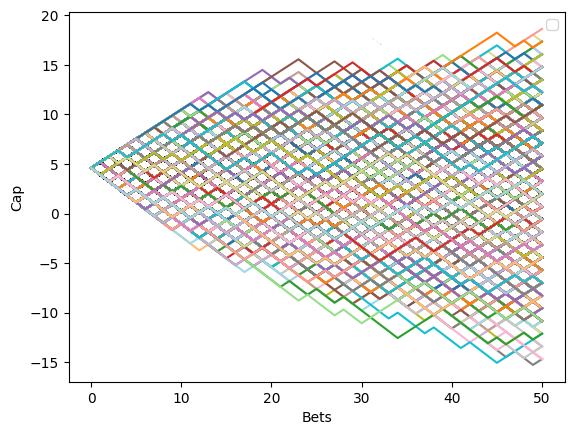

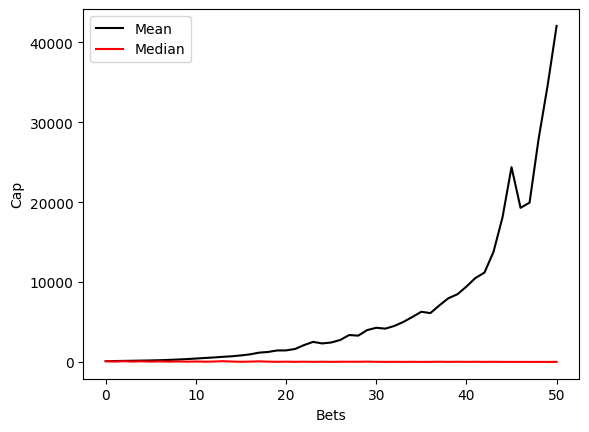

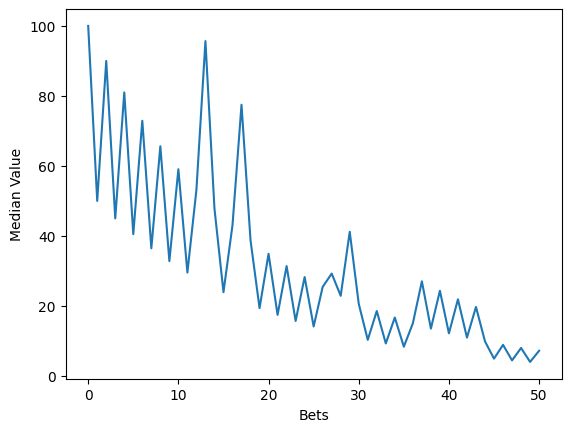

In [4]:
# non ergodic system. Average is different than median, most people lost their capital.
# the lower you go the less you gain
# for geometric games
# here the position size is that entire capital is allocated as betsize for each further trade.
results(caps_li,gr_rate, 'Geometric')

/////////////////////////////////////////////////////////

**Now for additive game.**

In [5]:
# simple investment Additive strategy
p = 0.5                # Probability of winning
b = 0.8                # Payoff for winning
a = 0.5                # Payoff for losing 1 ~ 100 % loss
initial_capital = 100  # Initial capital
num_bets = 50          # Number of bets to simulate
monte = 10000
caps_li, gr_rate = monte_carlo(p,b,a,initial_capital, num_bets, monte,'Additive')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Capital Median - > 475.0 , Capital Mean ->  475.6435
Growth rate Median -> 3.75 Growth rate Mean -> 2.7564350000000006


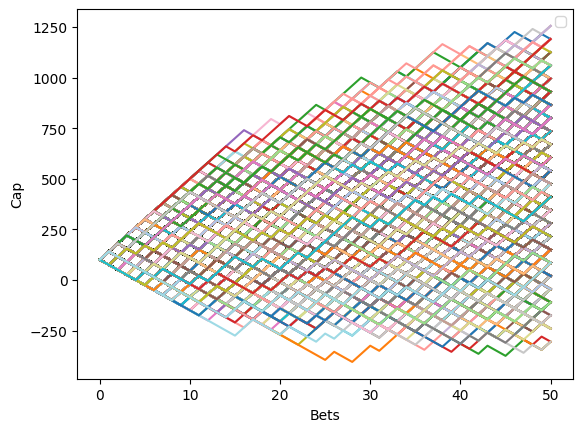

 No need for logarithmic view for Additive Investment strategies -> 


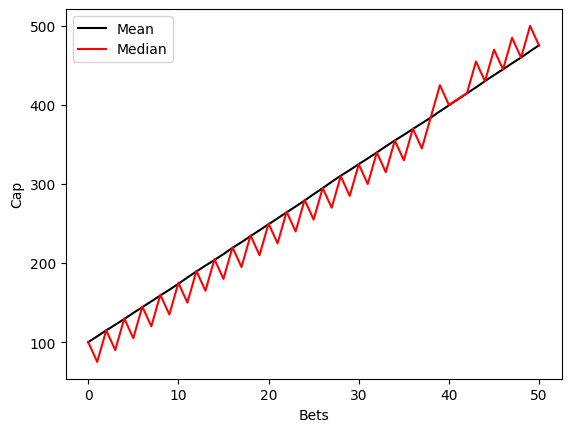

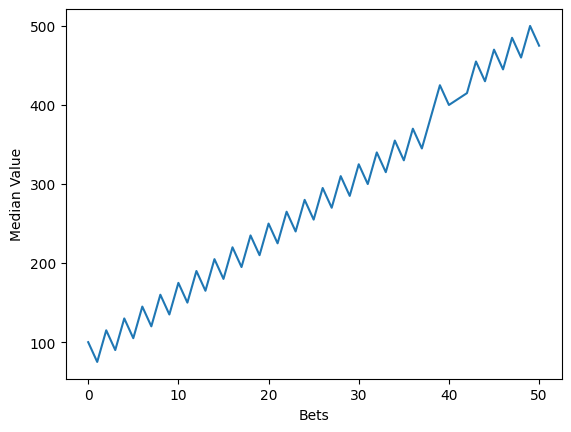

In [6]:
results(caps_li,gr_rate, 'Additive')

For additive strategy, a fixed amount is used for each further trade as bet size. Irrespective of profit and loss.

//////////////////////////////////////////////////////////

As Geometric style of investment had a greater mean, it performed poorly for most of the folks as median growth rate came out to be negative. Assuming ideal environment, we will try to optimize geometric style of investing with kelly criterion. But first, let us plot the growth rate graph and where it is maximised for geometric investment accounting for uncertainity like the probabilities.

<Axes: xlabel='f'>

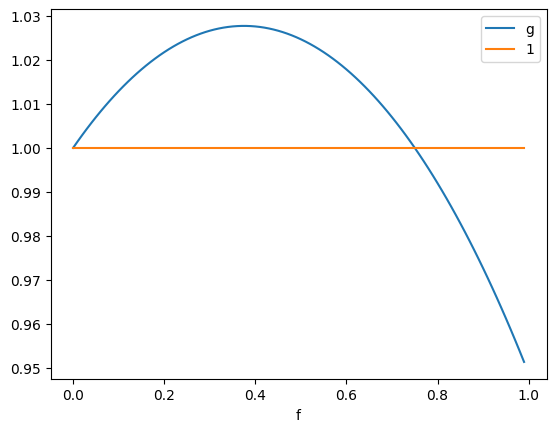

In [7]:
li = []
p = 0.5
b = 0.8
a = 0.5
for f in [i/100 for i in range(0,100)]:
    li.append([ f, ((1 + f*b)**p * (1 - f*a)**(1-p) ), 1])
pd.DataFrame(li, columns = ['f','g','1']).plot(x = 'f')

Extended Proof for kelly criterion :
https://en.wikipedia.org/wiki/Kelly_criterion
continued from the point where the differentiation is equal to 0

-> pb/(1+bf) + -qa/(1-af) = 0

-> (pb - pabf -qa -qabf)/((1 + bf)(1 - af)) = 0

-> (pb - pabf -qa -qabf) = 0

-> pb - qa = abf(p + q) #p+q = 1

-> p/a - q/b = f * (1)

-> f = p/a - q/b

In [8]:
# simulating Kelly Criterion
#kelly Criterion Execution
p = 0.5                # Probability of winning
b = 0.8                # Payoff for winning
a = 0.5                # Payoff for losing 1 ~ 100 % loss
initial_capital = 100  # Initial capital
num_bets = 50          # Number of bets to simulate
monte = 10000
caps_li, gr_rate = monte_carlo(p,b,a,initial_capital, num_bets, monte,'Kelly')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Capital Median - > 392.79689757530934 , Capital Mean ->  1459.6977286247848
Growth rate Median -> 2.9279689757530933 Growth rate Mean -> 12.596977286247846


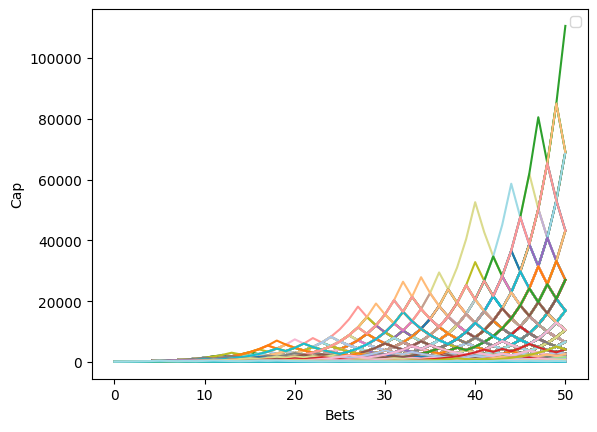

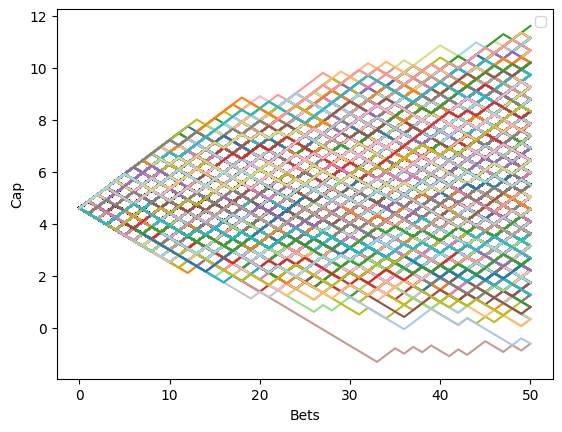

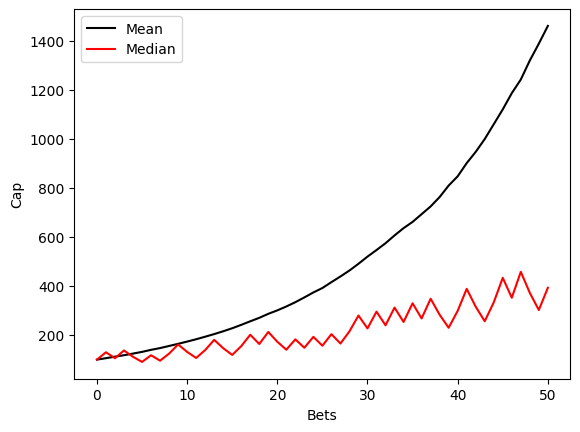

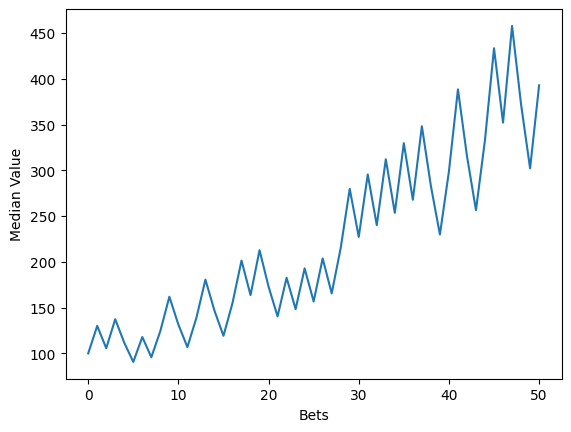

In [9]:
results(caps_li,gr_rate, 'Kelly')

Instead of original strategy of investing the entire capital remaining after profit or loss, kelly criterion suggest to use a fraction of the entire capital resulted from previous trade including profit or losses.

//////////////////////////////////////////////////////

If you look at the configuration of the game where the probability 0.5, means that in real world scenerio we could make money even if we do not have an edge by keeping winning payoff higher than losses in long term. But in real life the payoff that we used in the game are unreal,  its 80 % of the total capital. So let us simulate some real payoff scenerio by using kelly criterion.

Keep in mind when payoff is decreased, the value of f is increased above 1. This means the criterion tells us to use leverage. Let us see how the game simulates for following payoffs.

b = 0.08 #8% of the wealth gain each time
a = 0.05 #5% of the wealth lost each time

///////////////////////////////////////////////////////////

F > 1
Fraction of the total capital

In [10]:
p = 0.5                # Probability of winning
b = 0.08                # Payoff for winning
a = 0.05                # Payoff for losing 1 ~ 100 % loss
initial_capital = 100  # Initial capital
num_bets = 50          # Number of bets to simulate
monte = 10000
caps_li, gr_rate = monte_carlo(p,b,a,initial_capital, num_bets, monte,'Kelly')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Capital Median - > 1472.9883659074108 , Capital Mean ->  5614.362950704936
Growth rate Median -> 13.729883659074108 Growth rate Mean -> 54.14362950704937


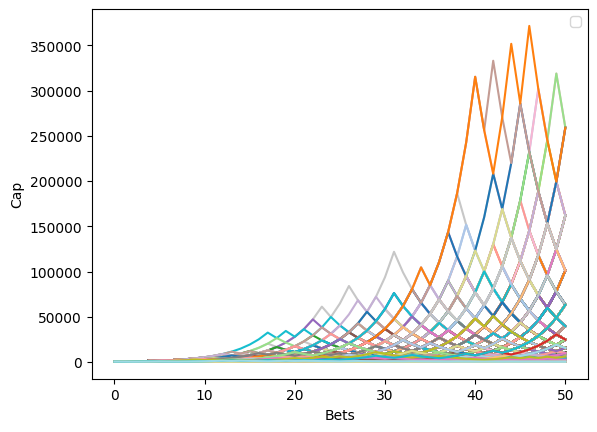

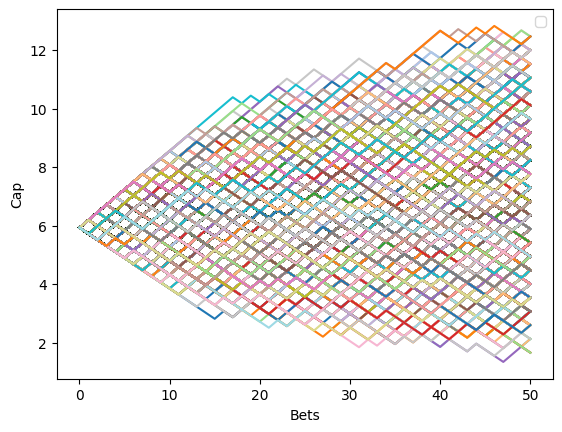

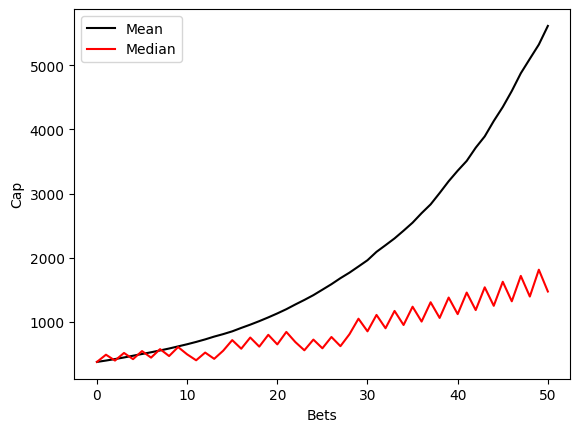

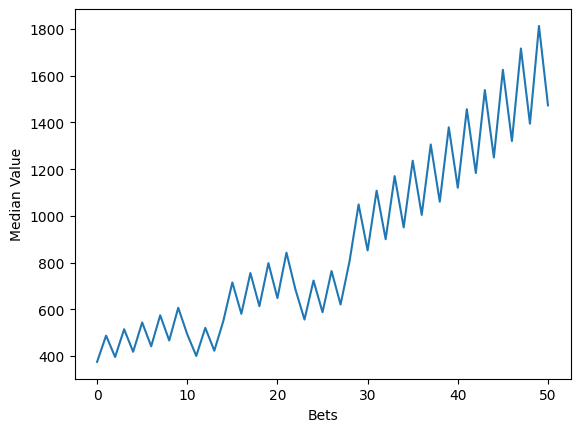

In [11]:
results(caps_li,gr_rate, 'Kelly')

In the above case, F > 1 meaning it suggest to use borrow money for investment for optimal growth rate. since f in the above case is 3.75 , so $375 were our initial capital. Logically speaking, the parameters that we have entered denotes that we have a investment strategy of Reward and risk with some serious Edge in case of F > 1.

In [12]:
print('Fraction f ->',kelly_criterion(0.5,0.08,0.05))

Fraction f -> 3.75


///////////////////////////////////////////////////////////////////

Extra Notes :

Extensive time has been invested in absorbing a wealth of information from various sources such as videos, blogs, posts, and podcasts pertaining to investing. Within the comprehensive architecture devised to establish a structured investing system, paramount importance was attributed to two fundamental pillars: Risk-Reward Ratio and Leverage. Through meticulous experimentation utilizing Monte Carlo simulations, we have unearthed substantiating evidence corroborating multiple claims disseminated across online platforms, thus reinforcing invaluable insights intended for global dissemination. Following an exhaustive exploration spanning content consumption, research across diverse mediums including blogs, search engines, and publicly available GPT models, we have arrived at a conclusive viewpoint – an opinion shaped by subjective expressions of personal beliefs or feelings, recognizing the inherent nuance therein. In our assessment, the aforementioned topics stand out as significant contributing factors to the unfortunate trend wherein many traders incur losses. We urge meticulous scrutiny and diligent investigation into these pivotal areas. The two focal points are:
1.   [Reward Risk Ratio](https://www.investopedia.com/terms/r/riskrewardratio.asp)
2.   [Leverage](https://www.investopedia.com/articles/forex/07/forex_leverage.asp)

Risk-Reward Ratio: As demonstrated in the preceding code, we conducted a Monte Carlo simulation employing the Kelly Criterion. Notably, the scenario under analysis lacked an edge. The probability of both wins and losses stood at 0.5 [50-50], resulting in an equal likelihood of outcomes. Despite this, a long-term strategy boasting a 50% accuracy rate, yet offering superior rewards relative to risks, remains a profitable endeavor. However, a common pitfall associated with Risk-Reward Ratios is as follows:
*	Failure to Set Clear Targets and Stop Loss
*	Unrealistic Profit Expectations
*	Negative Risk Reward Ratio: Accepting More Risk than Reward!
*	Chasing Losses!
*	Ignoring Market Conditions Leads to Being Overly Rigid and a Lack of Flexibility.
*	Fickle Mind Emotional Decision-Making leading to Deviate from their planned Risk-reward ratios and impulsive illogical decision-making that doesn’t align with sound trading strategy.
*	Neglecting position sizing
*	Ignoring Previous mistakes, not Reviewing, and Learning
*	Lack of Consistency
*	Failing to Adjust over time
*	Underestimating External Factors
*	Lack of Patience
*	Copying Others WITHOUT UNDERSTANDING!!
*	Underestimating Tail Events
*	Overtrusting Historical Patterns and relying solely on Technical Analysis
*	Setting Arbitrary risk without rationale
*	Overlooking correlations
*	Ignoring volatility changes
*	Overlooking Psychological Biases like overconfidence or anchoring
*	Chasing Trends without considering potential reversals
*	Neglecting News and Events
*	Neglecting Macroeconomic Trends

Here are several strategies to avoid the aforementioned pitfalls. It is essential to conduct thorough research tailored to your specific needs, as solutions vary based on individual trading behaviors. While we aim to provide generalized concepts for informational and educational purposes, it's important to note that the following points may or may not align with your specific requirements.

*	Educate Yourself
*	Develop a trading plan, strategies
*	Find and set Realistic Expectations [Game of curiosity]
*	Understand Market conditions, sentiment
*	 Have a strategy of Positive Risk-Reward Ratios.
*	Implement Proper Position Sizing
*	Learning Risk management tools like Stop-loss, dynamic position sizing based on Volatility
*	Portfolio Diversification
*	Stay Vigilant
*	Developing Checklist for Behavioral Biases Detection
*	Resist the urge for impulsive trading.
*	Staying Disciplined and practicing Consistency during Winning Streaks
*	Simulate trades
*	Journal and Document trades and research
*	Using Different Time Frames
*	Regularly Assess your Financial Goals


Following are more points where an investor makes common mistakes associated with using Leverage.
*	Excessive Leverage
*	Chasing losses with More Leverage!
*	Leverage with loans
*	Ignoring Interest Costs
*	Overlooking, underestimating, disregarding Margin Calls
*	Using Leverage with Illiquid Assets
*	Ignoring Leverage to Debt Ratios causing financial instability
*	Overreliance on Leverage for Returns
*	Using Leverage in Highly Speculative Assets. Risk’s Square!
*	Neglecting Fundamental analysis
*	Emotional Rollercoaster leading to Impulsive trading
*	Strained Financial Stability
*	Leverage Addiction!

Following are points that may or may not help you to avoid the above-discussed mistakes
*	Set Risk Tolerance
*	Using Leverage Strategically and Cautiously
*	Portfolio Diversification
*	Employ Robust risk management
*	Avoid emotional Decision making
*	Financial Health Assessment
*	Educate Yourself
*	Get some Help. Seek Professional Advice.
*	Learn from Past Mistakes
*	Develop and stick to a trading plan
*	Be Realistic and Set Realistic Expectations
*	Avoid Emotional Trading
*	Understand the Cost of Leverage
*	Establish Clear Investment Goals
*	Limit Leverage Levels
*	Understand the Cost of Leverage
*	Practice Patience
*	Utilize Demo or paper trading
*	Vigilant about Economic Indicators
*	Establish Emergency Funds
*	Monitor Debt levels
*	Take breaks and maintain work-life balance
*	Evaluation of Psychological preparedness for trading with leverage
*	Consider alternative Investment Strategies.

**Geometric Investment streategies**

Pros
*   Compounding Effects of capital invested
*   Adaptive allocation of capital.
*   Wealth reallocation improving Diversification for reducing portfolio risk
*   Portfolio Optimization by including outperforming assets dynamicallyin real time.
*   Potential tax benefits if tax advantage accounts are used. Less tax liabilities.
* Inflation hedge

Cons
*   Complexity, active monitoring required, a second delay could cause huge losses.
*   Market timing Risk
*   Higher Risk (Leverage risk), high return high risk.
*   Tax liabilities
*   High Psychological Stress could lead to illogical investment decisions.
*   High Transaction Cost.

**Additive Investment Strategies**

Pros

* Simplicity
* Portfolio Future cash flow estimation made easy. Predictability.
* Lower transaction cost. Trading No of share reduces.
* Stability
* Higher Possibility for Regular income.
* Risk Mitigation

Cons

* Comparitively Low returns.
* Low probability of Re-investment. As amount is fixed, profits are taken out of the portfolio
* Inflation Risk
* Missed Opportunities when health of Stock markets are Good.
* Limited Growth
* Long term risk

# Extra Simulations
More extra fun Visualization for Geometric Investment strategies and Investment strategy building.

In [13]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


def kelly_criterion(p, b, a):
    q = 1 - p
    f = (p/a - q/b)
    return f

p = 0.5   # Only constant
li = []
aa = 100
bb = 100
for a in range(1,300):
  for b in range(1,300):
    f = kelly_criterion(p,b/bb,a/aa)
    li.append([b/bb,a/aa,f, ((1 + f*b/bb)**p * (1 - f*a/aa)**(1-p) )])
  if a%(aa/10) == 0:
    print(a)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

fun = pd.DataFrame(li, columns = ['b','a','f','g'])
fun = fun[fun['f'] >= 0]
fun = fun[fun['f'] <= 1]
fun = fun.round(4)
# Custom color scale
custom_color_scale = [(0, 'yellow'), (0.5, 'lightgreen'), (1, 'blue')]
hover_text = [f'b: {row["b"]}, a: {row["a"]}, f: {row["f"]}' for index, row in fun.iterrows()]
# Create two 3D scatter plots using plotly.graph_objects
trace1 = go.Scatter3d(x=fun['b'], y=fun['a'], z=fun['f'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
fun = pd.DataFrame(li, columns = ['b','a','f','g'])
fun = fun.round(4)
hover_text = [f'b: {row["b"]}, a: {row["a"]}, f: {row["f"]}' for index, row in fun.iterrows()]

trace2 = go.Scatter3d(x=fun['b'], y=fun['a'], z=fun['f'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
fig = make_subplots(rows=1, cols=2, specs=[
    [{'type': 'scene'},
      {'type': 'scene'},
      ]
  ], subplot_titles=['(b,a,f)', '(b,a,f)'])
fig.add_trace(trace1, row=1, col=1)
fig.update_scenes(xaxis_title='b', yaxis_title='a', zaxis_title='f', row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_scenes(xaxis_title='b', yaxis_title='a', zaxis_title='f', row=1, col=2)
fig.update_layout(
    hovermode='x',
    title_text='3D Scatter Plots for Columns (b, a, f) with conditions and (b, a, f) Without conditions at probability ' + str(p),
)

# Show the interactive subplot
fig.show()

'''
AT SAME PAYOFF THE F COMES OUT TO BE ZERO, SO FUNCTION CHECKS OUT LOGICALLY.
The whole kelly function looks like a bed stuck to the wall.
On the edge of this bed,  Fraction is negative , place for people to short the Instrument.
Area near the wall are for long sentiments . Positive fraction.

'''

Output hidden; open in https://colab.research.google.com to view.

Note for folks using leverage.

We have generated two 3D plots depicting the relationship between the x-y-z axes, representing (Reward-Risk-Kelly Criterion) in scenarios where there is no edge, with an accuracy of 0.5 or 50%. The z-axis indicates the estimated position sizing, detailing the optimal fraction of capital to allocate to each trade for long-term growth. Typically, this fraction is less than 1, denoting a conservative approach of utilizing only a portion of the total capital.

The second plot, resembling a bed stuck to a wall, illustrates values omitted in the first plot based on the condition where f (Kelly Criterion) is less than 1. Conversely, when f is greater than 1, Kelly suggests leveraging for investing.

Focusing on the 'why' behind Kelly Criterion's recommendation to use leverage, it's imperative to understand the risk-reward ratio. When F exceeds 1, a notable pattern emerges: the magnitude of Reward significantly outweighs Risk. However, such high reward-to-risk ratios are rare in reality and are often associated with major events, detectable only through fundamental analysis of financial markets.

In our research-driven opinion, strategies advocating for extensive leverage in short to medium-term trading scenarios, where the reward-to-risk ratio prescribed by the Optimal Kelly Criterion is exceptionally rare for fractions greater than one, are inherently counterintuitive. These moments of opportunity are typically tied to significant market events and require astute fundamental analysis for detection.

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

fun = pd.DataFrame(li, columns = ['b','a','f', 'g'])
fun = fun[fun['f'] >= 0]
fun = fun[fun['f'] <= 1]
fun = fun.round(4)
# Custom color scale
custom_color_scale = [(0, 'yellow'), (0.5, 'lightgreen'), (1, 'blue')]
hover_text = [f'b: {row["b"]}, a: {row["a"]}, g: {row["g"]}' for index, row in fun.iterrows()]
# Create two 3D scatter plots using plotly.graph_objects
trace1 = go.Scatter3d(x=fun['b'], y=fun['a'], z=fun['g'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
hover_text = [f'b: {row["b"]}, f: {row["f"]}, g: {row["g"]}' for index, row in fun.iterrows()]

trace2 = go.Scatter3d(x=fun['b'], y=fun['f'], z=fun['g'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
hover_text = [f'a: {row["a"]}, b : {row["b"]}, f : {row["f"]}, g: {row["g"]}' for index, row in fun.iterrows()]

trace3 = go.Scatter3d(x=fun['a'], y=fun['f'], z=fun['g'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')


fig = make_subplots(rows=1, cols=3, specs=[
    [{'type': 'scene'},
      {'type': 'scene'},
      {'type': 'scene'}
      ]
  ], subplot_titles=['(b,a,g)', '(b,f,g)','(a,f,g)'])




fig.add_trace(trace1, row=1, col=1)
fig.update_scenes(xaxis_title='b', yaxis_title='a', zaxis_title='g', row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_scenes(xaxis_title='b', yaxis_title='f', zaxis_title='g', row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.update_scenes(xaxis_title='a', yaxis_title='f', zaxis_title='g', row=1, col=3)
fig.update_layout(
    hovermode='x',
    title_text='3D Scatter Plots for Columns (b, a, g) and (b, f, g), (a,f,g) With conditions at probability ' + str(p),
)

# Show the interactive subplot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

For designing strategies assuming an ideal environment where grrowth rate of end capital is introduced.

In [16]:
fun = pd.DataFrame(li, columns = ['b','a','f', 'g'])
#No conditions
fun = fun.round(4)
# Custom color scale
custom_color_scale = [(0, 'yellow'), (0.5, 'lightgreen'), (1, 'blue')]
hover_text = [f'b: {row["b"]}, a: {row["a"]}, g: {row["g"]}' for index, row in fun.iterrows()]
# Create two 3D scatter plots using plotly.graph_objects
trace4 = go.Scatter3d(x=fun['b'], y=fun['a'], z=fun['g'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
hover_text = [f'b: {row["b"]}, f: {row["f"]}, g: {row["g"]}' for index, row in fun.iterrows()]

trace5 = go.Scatter3d(x=fun['b'], y=fun['f'], z=fun['g'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
hover_text = [f'a: {row["a"]}, b : {row["b"]}, f : {row["f"]}, g: {row["g"]}' for index, row in fun.iterrows()]

trace6 = go.Scatter3d(x=fun['a'], y=fun['f'], z=fun['g'], mode='markers',
                      marker=dict(color=fun['g'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
fig = make_subplots(rows=1, cols=3, specs=[
    [{'type': 'scene'},
      {'type': 'scene'},
      {'type': 'scene'}
      ]
  ], subplot_titles=['(b,a,g)', '(b,f,g)','(a,f,g)'])

fig.add_trace(trace4, row=1, col=1)
fig.update_scenes(xaxis_title='b', yaxis_title='a', zaxis_title='g', row=1, col=1)
fig.add_trace(trace5, row=1, col=2)
fig.update_scenes(xaxis_title='b', yaxis_title='f', zaxis_title='g', row=1, col=2)
fig.add_trace(trace6, row=1, col=3)
fig.update_scenes(xaxis_title='a', yaxis_title='f', zaxis_title='g', row=1, col=3)
fig.update_layout(
    hovermode='x',
    title_text='3D Scatter Plots for Columns (b, a, g) and (b, f, g), (a,f,g) without conditions at probability ' + str(p),
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

For folks who are looking foward to incorporating Leverage to their investment strategies.

Practical non ideal discussion and simulations of position sizing incorporating the Kelly Criterion are conducted in onf of the stated concepts of the notebook available within the document titled GSB (Generic Strategy Building). We strongly advise reading through this document for comprehensive insights.

Please Explore various parameter combinations and probabilities to observe the corresponding changes in growth rates across the multiple subplots provided above. These plots offer estimations of growth rates and fractions for different payouts and probabilities, aiding in the design of investment strategies, particularly for geometric-type investment strategies

Hope this helps.

Thank you

Be careful

By Infi-flux